# Feature Scaling & Transformation — Why Your Model Needs It

**Objective**: Understand **what scaling is**, **why it's critical**, and **how to apply it** using real-world data.

---

## 1. What is Feature Scaling?

**Definition**: Adjusting numerical features to a **common scale** without distorting differences in ranges.

### Example Without Scaling

| Customer | Age | Income (Lakhs) |
|---------|-----|----------------|
| A       | 30  | 5              |
| B       | 35  | 50             |

→ `Income` dominates → model ignores `Age`!

### After Scaling

Both features contribute **equally**.

---

## 2. Why Do Models Need Scaling?

| Model Type | Needs Scaling? | Reason |
|------------|----------------|--------|
| **Linear Regression** | Yes | Coefficients depend on magnitude |
| **Logistic Regression** | Yes | Gradient descent converges faster |
| **KNN, K-Means** | Yes | Distance-based |
| **SVM** | Yes | Margin calculation |
| **Neural Networks** | Yes | Gradient stability |
| **Decision Trees** | No | Splits on rank, not value |
| **Random Forest** | No | Tree-based |

**Key Insight**: **Distance or gradient-based models require scaling**

---

## 3. Real-World Example: Loan Approval Prediction

We have 6 customers applying for a loan:

| Customer | Age | Income (Lakhs) | Credit Score | Approved? |
|---------|-----|----------------|--------------|-----------|
| 1       | 25  | 3              | 600          | 0         |
| 2       | 45  | 8              | 750          | 1         |
| 3       | 35  | 6              | 700          | 1         |
| 4       | 50  | 4              | 650          | 0         |
| 5       | 23  | 9              | 800          | 1         |
| 6       | 40  | 5              | 680          | 0         |

**Problem**: `Income` (0–10) vs `Age` (20–60) vs `Credit Score` (300–850) → **different scales!**

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'age': [25, 45, 35, 50, 23, 40],
    'income_lakhs': [3, 8, 6, 4, 9, 5],
    'credit_score': [600, 750, 700, 650, 800, 680],
    'approved': [0, 1, 1, 0, 1, 0]
})

print("Raw Loan Data:")
df

Raw Loan Data:


,age,income_lakhs,credit_score,approved
0,25,3,600,0
1,45,8,750,1
2,35,6,700,1
3,50,4,650,0
4,23,9,800,1
5,40,5,680,0


---

## 4. Scaling Methods — Theory + Math

### 1. MinMax Scaling (0 to 1)

**Formula**:
$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

**When to Use**:
- Data has **bounds**
- Neural networks, KNN
- No outliers

**Pros**: Preserves original distribution  
**Cons**: Sensitive to outliers

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['age', 'income_lakhs', 'credit_score']])

df_minmax = pd.DataFrame(scaled, columns=['age_scaled', 'income_scaled', 'credit_scaled'])
print("After MinMax Scaling (0–1):")
df_minmax.round(3)

After MinMax Scaling (0–1):


,age_scaled,income_scaled,credit_scaled
0,0.074,0.000,0.00
1,0.815,0.833,0.75
2,0.444,0.500,0.50
3,1.000,0.167,0.25
4,0.000,1.000,1.00
5,0.630,0.333,0.40


### 2. Standard Scaling (Z-Score)

**Formula**:
$$
x' = \frac{x - \mu}{\sigma}
$$

**When to Use**:
- Data is **normally distributed**
- Linear models, SVM, Logistic Regression

**Pros**: Robust to distribution  
**Cons**: Not bounded

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df[['age', 'income_lakhs', 'credit_score']])

df_std = pd.DataFrame(scaled, columns=['age_z', 'income_z', 'credit_z'])
print("After Standard Scaling (mean=0, std=1):")
df_std.round(3)

After Standard Scaling (mean=0, std=1):


,age_z,income_z,credit_z
0,-1.149,-1.340,-1.488
1,0.879,1.025,0.821
2,-0.135,0.079,0.051
3,1.386,-0.867,-0.718
4,-1.352,1.497,1.590
5,0.372,-0.394,-0.256


### 3. Robust Scaling (Outlier-Resistant)

**Formula**:
$$
x' = \frac{x - Q2}{Q3 - Q1}
$$

**When to Use**:
- **Outliers present**
- Real-world data (income, house prices)

**Pros**: Ignores extreme values  
**Cons**: Less intuitive

In [8]:
from sklearn.preprocessing import RobustScaler

# Add outlier
df_with_outlier = df.copy()
df_with_outlier.loc[6] = [30, 100, 850, 1]  # Extreme income

scaler = RobustScaler()
scaled = scaler.fit_transform(df_with_outlier[['age', 'income_lakhs', 'credit_score']])

print("Robust Scaling handles outliers better!")

Robust Scaling handles outliers better!


---

## 5. Feature Transformation — Fix Skewness

### What is Skewed Data?

- **Right-skewed**: Income, house prices, time-to-event
- **Left-skewed**: Rare

**Problem**: Linear models assume normality

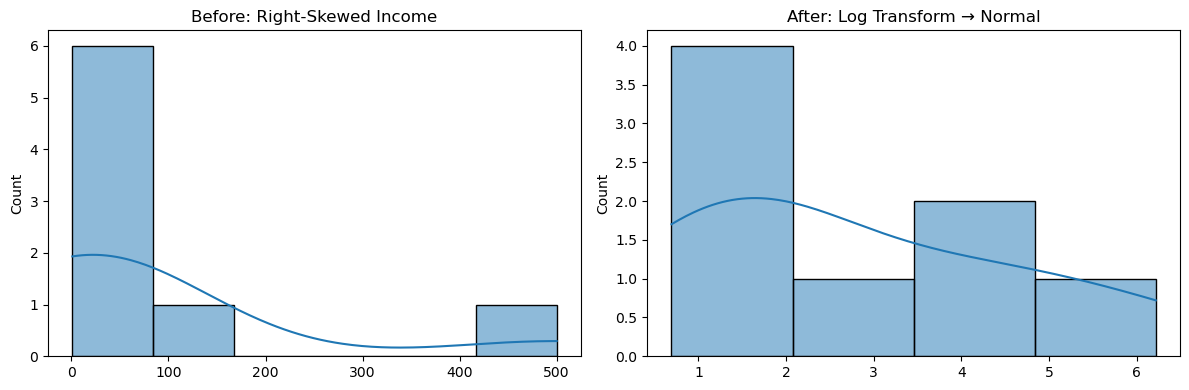

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Highly skewed income
income_skewed = [1, 2, 3, 5, 10, 50, 100, 500]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(income_skewed, ax=ax1, kde=True)
ax1.set_title('Before: Right-Skewed Income')

income_log = np.log1p(income_skewed)
sns.histplot(income_log, ax=ax2, kde=True)
ax2.set_title('After: Log Transform → Normal')

plt.tight_layout()
plt.show()

### Common Transformations

| Transform | Formula | Use Case |
|---------|--------|----------|
| **Log** | $ \log(1+x) $ | Right-skewed, positive |
| **Square Root** | $ \sqrt{x} $ | Count data |
| **Box-Cox** | Only positive | Advanced |

---

## 6. Critical Rules

1. **Fit on train only** → avoid data leakage
2. **Transform test using train stats**
3. **Apply same to production data**

```python
# Correct
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

---

## 7. Summary Table

| Method | Range | Outlier Robust? | Best For |
|--------|-------|------------------|----------|
| **MinMax** | [0,1] | No | Neural nets, KNN |
| **Standard** | ~[-3,3] | No | Linear models |
| **Robust** | Varies | Yes | Real-world data |
| **Log** | (-∞, ∞) | Yes | Skewed data |

**Key Takeaway**:
> **Scale for distance/gradient models**  
> **Transform for skewness**  
> **Always fit on train only**

---
**End of Notebook**